## Initialization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

## Load Data

The *dataset* we need is stored in the `/datasets/faces/` folder. In that folder you can find: - The `final_file` folder with 7.6k photos
- *File* `labels.csv` which contains labels, with two columns: `file_name` and `real_age`

Given the large number of *image* files, it is recommended that you do not read them all at once, as this will only use up computing resources. We recommend you to create a generator with ImageDataGenerator. This method was previously explained in Chapter 3, Lesson 7.

The label *file* can be loaded as a normal CSV *file*.

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')

In [3]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [4]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


In [5]:
labels.duplicated().sum()

0

In [6]:
labels.shape

(7591, 2)

In [7]:
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [8]:
datagen = ImageDataGenerator(validation_split=0.25, rescale=1/255.)

In [9]:
train_datagen = ImageDataGenerator(
    validation_split=0.25, rescale=1.0 / 255, horizontal_flip=True, vertical_flip=True,
    rotation_range=90, width_shift_range=0.2, height_shift_range=0.2
)

In [10]:
validation_datagen = ImageDataGenerator(
    validation_split=0.25, rescale=1.0 / 255
)

In [11]:
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


In [12]:
validat_gen_flow = validation_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


<div style="background-color:rgba(0, 255, 172, 0.07)"
     
From the steps above and reading the data taken from the file /datasets/faces/labels.csv', it is known that the file has 17 columns and 47331 rows. There are no duplicate values, no null values, there are 7591 rows and 2 columns. Meanwhile, from the data generator, the results are the same, there are 7591 photos. The average age is 31 years with a minimum age of 1 year and a maximum of 100 years.
     
</div>

## EDA

In [13]:
features, target = next(train_gen_flow)

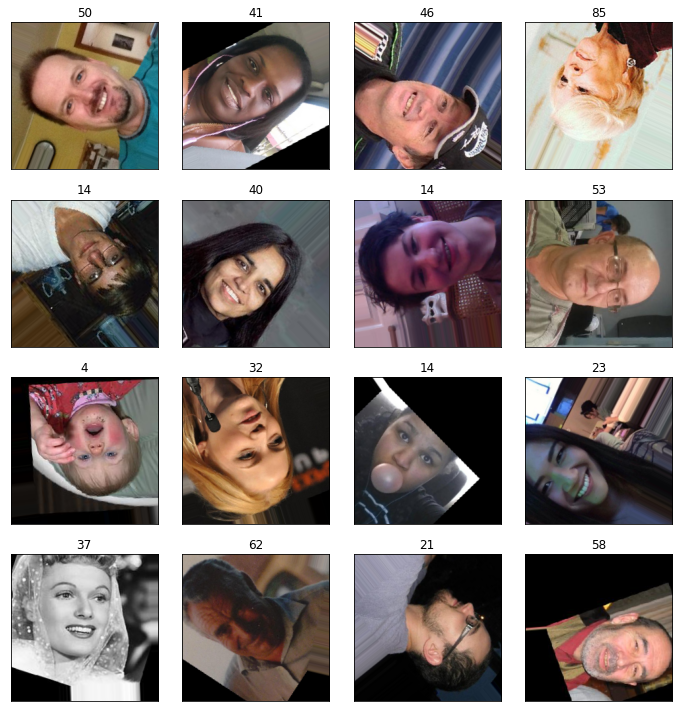

In [14]:
fig = plt.figure(figsize=(10,10))
for i in range(16):
    ax = fig.add_subplot(4, 4, i+1)
    ax.set_title(target[i])
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


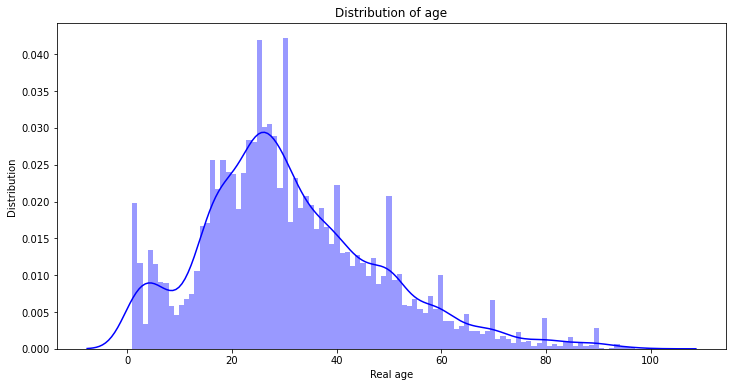

In [15]:
plt.figure(figsize=(12, 6))
sns.distplot(labels['real_age'], kde=True, bins=100, color='blue')
plt.title('Distribution of age')
plt.ylabel('Distribution')
plt.xlabel('Real age')
plt.show()

### Findings

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
The average person visiting the shop is a person aged 30 years, according to the descriptive table. Over 40 there are also many who still visit the shop but the number has decreased.
     
</div>

## Data Modelling

Define the necessary functions to train your model on the GPU platform and create a single script that contains all of these functions with an initialization section.

To make this task easier, you can define it in *this notebook* and run the ready-made code in the next section to build the script automatically.
The definitions below will also be checked by project reviewers so they can understand how you build your model.

In [ ]:
import pandas as pd

import tensorflow as tf

dari tensorflow.keras.preprocessing.image impor ImageDataGenerator
dari tensorflow.keras.applications.resnet impor ResNet50
dari tensorflow.keras.models impor Sequential
dari tensorflow.keras.layers impor GlobalAveragePooling2D, Dense, Dropout, Flatten
dari tensorflow.keras.optimizers impor Adam

In [17]:
def load_train(path):
    
    """
    Kode ini memuat bagian training set dari file path
    """
    labels = pd.read_csv('/datasets/faces/labels.csv')
    train_datagen = ImageDataGenerator(validation_split = 0.25, rescale = 1/255, 
                                 horizontal_flip = True, vertical_flip = True, rotation_range = 90)
    
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size = (224, 224),
        batch_size = 32,
        class_mode = 'raw',
        subset = 'training',
        seed=12345)
    
    features, target = next(train_gen_flow)
    
    return train_gen_flow

In [18]:
def load_test(path):
    
    """
    Kode ini memuat bagian validation set/test set dari file path
    """
    labels = pd.read_csv('/datasets/faces/labels.csv')
    test_datagen = ImageDataGenerator(validation_split = 0.25, rescale = 1/255)
    
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size = (224, 224),
        batch_size = 32,
        class_mode = 'raw',
        subset = 'validation',
        seed=12345)
    
    
    return test_gen_flow

In [19]:
def create_model(input_shape):
    
    """
    Kode ini mendefinisikan model
    """
    backbone = ResNet50(
        input_shape=(150, 150, 3), weights='imagenet', include_top=False
    )

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(350, activation='relu'))
    model.add(Dense(185, activation='relu'))
    model.add(Dense(1, activation='relu'))
    
    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer,
                  loss='mse', metrics=['mae']
                  )

    return model

In [20]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Melatih model dengan parameter yang diberikan
    """
    model.fit(train_data,
          validation_data=test_data,
          batch_size=batch_size,
          epochs=epochs,
          steps_per_epoch=steps_per_epoch,
          validation_steps=validation_steps, verbose = 2)
    
    return model


## Prepare the Script to run on the GPU platform

In [21]:
# siapkan skrip untuk menjalankan platform GPU


init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### Output

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
2023-05-27 06:21:44.903063: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2023-05-27 06:21:44.996838: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
Using TensorFlow backend.
Found 5694 validated image filenames.
Found 1897 validated image filenames.
2023-05-27 06:21:49.715308: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-05-27 06:21:49.810750: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-27 06:21:49.810942: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2023-05-27 06:21:49.810977: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-05-27 06:21:49.811011: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-05-27 06:21:49.886954: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2023-05-27 06:21:49.902706: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2023-05-27 06:21:50.071073: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2023-05-27 06:21:50.083584: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2023-05-27 06:21:50.083640: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2023-05-27 06:21:50.083726: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-27 06:21:50.083951: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-27 06:21:50.084128: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2023-05-27 06:21:50.084503: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2023-05-27 06:21:50.116493: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300020000 Hz
2023-05-27 06:21:50.119040: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3a8b0d0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-05-27 06:21:50.119068: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-05-27 06:21:50.251216: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-27 06:21:50.251509: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x18c9720 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-27 06:21:50.251532: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-16GB, Compute Capability 7.0
2023-05-27 06:21:50.251729: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-27 06:21:50.251894: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2023-05-27 06:21:50.251937: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-05-27 06:21:50.251950: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-05-27 06:21:50.251978: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2023-05-27 06:21:50.251994: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2023-05-27 06:21:50.252010: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2023-05-27 06:21:50.252025: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2023-05-27 06:21:50.252036: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2023-05-27 06:21:50.252093: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-27 06:21:50.252269: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-27 06:21:50.252507: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2023-05-27 06:21:50.253753: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-05-27 06:21:52.417004: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-05-27 06:21:52.417044: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 
2023-05-27 06:21:52.417052: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 
2023-05-27 06:21:52.418686: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-27 06:21:52.418944: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-27 06:21:52.419114: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-05-27 06:21:52.419148: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14988 MB memory) -> physical GPU (device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:1e.0, compute capability: 7.0)
Downloading data from https://github.com/keras-team/keras-applications/releases/download/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

    8192/94765736 [..............................] - ETA: 1s
12173312/94765736 [==>...........................] - ETA: 0s
24993792/94765736 [======>.......................] - ETA: 0s
37666816/94765736 [==========>...................] - ETA: 0s
50339840/94765736 [==============>...............] - ETA: 0s
63184896/94765736 [===================>..........] - ETA: 0s
75849728/94765736 [=======================>......] - ETA: 0s
88793088/94765736 [===========================>..] - ETA: 0s
94773248/94765736 [==============================] - 0s 0us/step
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 178 steps, validate for 60 steps
Epoch 1/20
2023-05-27 06:22:10.012208: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-05-27 06:22:11.163175: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 114s - loss: 255.2431 - mae: 11.7922 - val_loss: 628.8049 - val_mae: 20.0900
Epoch 2/20
178/178 - 91s - loss: 138.0654 - mae: 9.0013 - val_loss: 560.5030 - val_mae: 18.6168
Epoch 3/20
178/178 - 91s - loss: 112.3991 - mae: 8.1251 - val_loss: 300.7904 - val_mae: 12.8786
Epoch 4/20
178/178 - 91s - loss: 100.8581 - mae: 7.6793 - val_loss: 177.3835 - val_mae: 10.0878
Epoch 5/20
178/178 - 91s - loss: 87.6450 - mae: 7.1047 - val_loss: 125.4016 - val_mae: 8.4202
Epoch 6/20
178/178 - 91s - loss: 78.1865 - mae: 6.7235 - val_loss: 106.5310 - val_mae: 7.6387
Epoch 7/20
178/178 - 91s - loss: 69.7241 - mae: 6.4394 - val_loss: 93.2722 - val_mae: 7.2111
Epoch 8/20
178/178 - 91s - loss: 65.6113 - mae: 6.1991 - val_loss: 128.2756 - val_mae: 8.9905
Epoch 9/20
178/178 - 91s - loss: 58.8973 - mae: 5.8959 - val_loss: 115.7079 - val_mae: 8.3454
Epoch 10/20
178/178 - 91s - loss: 52.2617 - mae: 5.5699 - val_loss: 99.9476 - val_mae: 7.5418
Epoch 11/20
178/178 - 91s - loss: 51.9130 - mae: 5.5428 - val_loss: 91.1534 - val_mae: 7.3351
Epoch 12/20
178/178 - 91s - loss: 45.0161 - mae: 5.1809 - val_loss: 92.6788 - val_mae: 7.0043
Epoch 13/20
178/178 - 91s - loss: 41.9172 - mae: 5.0182 - val_loss: 96.1673 - val_mae: 7.2296
Epoch 14/20
178/178 - 91s - loss: 38.2464 - mae: 4.7557 - val_loss: 88.6622 - val_mae: 7.0238
Epoch 15/20
178/178 - 91s - loss: 38.8955 - mae: 4.7653 - val_loss: 103.7774 - val_mae: 7.8045
Epoch 16/20
178/178 - 91s - loss: 33.0771 - mae: 4.4686 - val_loss: 117.0026 - val_mae: 7.9601
Epoch 17/20
178/178 - 91s - loss: 31.2955 - mae: 4.2931 - val_loss: 90.4073 - val_mae: 7.0745
Epoch 18/20
178/178 - 91s - loss: 29.7624 - mae: 4.1866 - val_loss: 90.8603 - val_mae: 7.0480
Epoch 19/20
178/178 - 91s - loss: 26.9108 - mae: 3.9808 - val_loss: 98.5903 - val_mae: 7.1794
Epoch 20/20
178/178 - 91s - loss: 26.6000 - mae: 3.9377 - val_loss: 93.3046 - val_mae: 7.2232
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 9s - loss: 93.3046 - mae: 7.2232
Test MAE: 7.2232
     
</div>

## Conclusion

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
- The goal of this project is to develop a neural network model that predicts a person's age from a photo. The metric for this project is MAE and cannot be more than 8. There are more than 75000 thousand photos in the dataframe. The average age of the people in this photo is in their 30s.

Have applied some data augmentation to help the model ie

- horizontal_flip
- vertical_flip
- 90 degree rotation

The model is made with the Restnet50 layer, which is a network with a depth of 50 layers. In addition, 3 layers are also added with all ReLu activations.

- The model shows the desired quality - after 20 Epoch its MAE is 7.23 (less than 8). This means that the average predicted age of the model that is different from the actual age is 7.23 years.

</div>